In [11]:
'''libraries'''

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [13]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
# normaliization

cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max() - x.min()))

In [16]:
 diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [19]:
# column inputs to the neural network

num_preg = tf.feature_column.numeric_column('Pregnancies')
glu = tf.feature_column.numeric_column('Glucose')
bp = tf.feature_column.numeric_column('BloodPressure')
skin = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

In [17]:
diabetes.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
# we cna use tf.fat_col.categorical_column_hash_buvket('column name', hash_bukcet_size = 10) that is the max of the 
# variety we expect to exist in that column



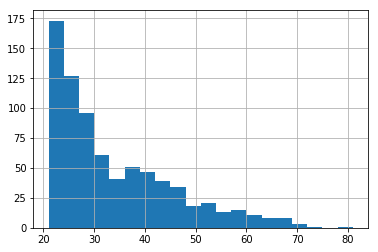

In [22]:
diabetes['Age'].hist(bins=20)

In [23]:
# bucket encoding the categotical data

age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [24]:
feat_cols =[num_preg,glu,bp , skin, insulin , bmi, pedigree, age_bucket]

In [25]:
# SPLITTING

In [26]:
x_data = diabetes.drop('Outcome',axis=1)
labels = diabetes['Outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state = 101)

In [29]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [30]:
'''building the model using the estimator class'''

model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_global_id_in_cluster': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_train_distribute': None, '_num_worker_replicas': 1, '_experimental_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f527f73fd30>, '_master': '', '_eval_distribute': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_device_fn': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_service': None, '_tf_random_seed': None, '_is_chief': True, '_model_dir': '/tmp/tmpoad14tnp', '_save_summary_steps': 100, '_num_ps_replicas': 0, '_protocol': None, '_task_id': 0}


In [31]:
'''model trainingn with 1000-steps'''

model.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpoad14tnp/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 181.159
INFO:tensorflow:loss = 8.103988, step = 101 (0.559 sec)
INFO:tensorflow:global_step/sec: 250.916
INFO:tensorflow:loss = 7.233658, step = 201 (0.400 sec)
INFO:tensorflow:global_step/sec: 234.635
INFO:tensorflow:loss = 3.9758625, step = 301 (0.422 sec)
INFO:tensorflow:global_step/sec: 202.585
INFO:tensorflow:loss = 4.5170717, step = 401 (0.496 sec)
INFO:te

In [32]:
'''evaluating the model on the test data'''

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [33]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-30-01:01:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoad14tnp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-30-01:01:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.8006584, auc_precision_recall = 0.6520159, average_loss = 0.52968645, global_step = 1000, label/mean = 0.35064936, loss = 5.098232, precision = 0.6282051, prediction/mean = 0.40113917, recall = 0.60493827
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpoad14tnp/model.ckpt-1000


In [34]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8006584,
 'auc_precision_recall': 0.6520159,
 'average_loss': 0.52968645,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.098232,
 'precision': 0.6282051,
 'prediction/mean': 0.40113917,
 'recall': 0.60493827}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

pred= list(model.predict(pred_input_func))
pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoad14tnp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.53295046], dtype=float32),
  'logits': array([0.13199317], dtype=float32),
  'probabilities': array([0.4670495 , 0.53295046], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.68203694], dtype=float32),
  'logits': array([0.7631484], dtype=float32),
  'probabilities': array([0.31796312, 0.68203694], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4240459], dtype=float32),
  'logits': array([-0.30618644], dtype=float32),
  'probabilities': array([0.57595414, 0.42404586], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35395166], dtype=float32),
  'logits': array([-0.60171384], dtype=float32),
  'probabilities': array([0.6460483, 0.3539517], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=ob

# DNN MODEL

In [43]:
'''DNN model using the estimator'''

dnn_model  = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,20,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_global_id_in_cluster': 0, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_train_distribute': None, '_num_worker_replicas': 1, '_experimental_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f527f3d0e10>, '_master': '', '_eval_distribute': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_device_fn': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_service': None, '_tf_random_seed': None, '_is_chief': True, '_model_dir': '/tmp/tmp3pu1mozi', '_save_summary_steps': 100, '_num_ps_replicas': 0, '_protocol': None, '_task_id': 0}


In [37]:
# when we have categorical data, we need to provide embedded i.e. an indicator columns

# embedded_col = tf.feature_column.embedding_column('column name', dimension=4)

# and reset the feat columns

In [44]:
# input function for the dnn model

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, num_epochs=1000, shuffle=True,batch_size=10 )

In [45]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3pu1mozi/model.ckpt.
INFO:tensorflow:loss = 6.855909, step = 1
INFO:tensorflow:global_step/sec: 252.8
INFO:tensorflow:loss = 4.7771306, step = 101 (0.400 sec)
INFO:tensorflow:global_step/sec: 322.827
INFO:tensorflow:loss = 5.4640226, step = 201 (0.308 sec)
INFO:tensorflow:global_step/sec: 302.828
INFO:tensorflow:loss = 4.7990046, step = 301 (0.338 sec)
INFO:tensorflow:global_step/sec: 303.636
INFO:tensorflow:loss = 5.639063, step = 401 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.783
INFO:tensorflow:loss = 2.6880565, step = 501 (0.331 sec)
INFO:tensorflow:global_step/sec: 297.796
INFO:tensorflow:loss = 5.3111787, step = 601 (0.334 sec)
INFO:tensorflow:global_step/sec: 298.324
INFO:tensorflow:loss

In [46]:
'''evaluation of dnn model on diabetes prediction'''

eval_inp = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, num_epochs=1, shuffle=False, batch_size=10)

In [47]:
dnn_model.evaluate(eval_inp)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-30-01:10:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3pu1mozi/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-30-01:11:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.83625513, auc_precision_recall = 0.71787834, average_loss = 0.4819115, global_step = 1000, label/mean = 0.35064936, loss = 4.638398, precision = 0.64772725, prediction/mean = 0.39431316, recall = 0.7037037
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp3pu1mozi/model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83625513,
 'auc_precision_recall': 0.71787834,
 'average_loss': 0.4819115,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.638398,
 'precision': 0.64772725,
 'prediction/mean': 0.39431316,
 'recall': 0.7037037}